<a href="https://colab.research.google.com/github/amshumayee/LGMVIP-DataScience/blob/main/image_to_pencil_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
from matplotlib.image import imread
image_raw=imread('img1.jpg')
image_raw


array([[[97, 97, 95],
        [97, 97, 95],
        [97, 97, 95],
        ...,
        [95, 95, 93],
        [95, 95, 93],
        [98, 97, 93]],

       [[97, 97, 95],
        [97, 97, 95],
        [97, 97, 95],
        ...,
        [94, 94, 92],
        [94, 94, 92],
        [96, 95, 91]],

       [[96, 96, 94],
        [96, 96, 94],
        [96, 96, 94],
        ...,
        [93, 92, 90],
        [93, 92, 90],
        [94, 93, 89]],

       ...,

       [[83, 83, 81],
        [83, 83, 81],
        [82, 82, 80],
        ...,
        [61, 61, 59],
        [61, 61, 59],
        [64, 64, 62]],

       [[83, 83, 81],
        [83, 83, 81],
        [82, 82, 80],
        ...,
        [61, 61, 59],
        [61, 61, 59],
        [64, 64, 62]],

       [[83, 83, 81],
        [83, 83, 81],
        [82, 82, 80],
        ...,
        [61, 61, 59],
        [61, 61, 59],
        [64, 64, 62]]], dtype=uint8)

In [3]:
image_raw.shape

(131, 233, 3)

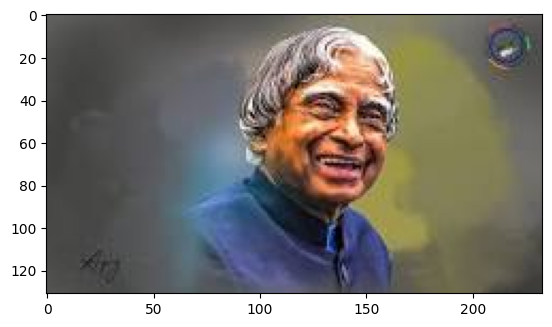

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image_raw)

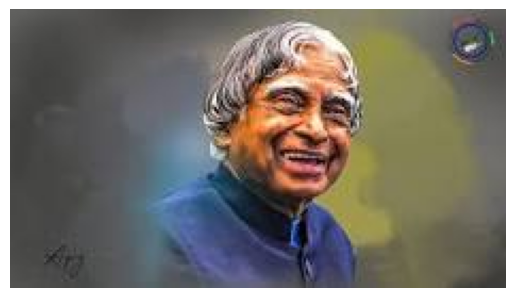

In [5]:
plt.imshow(image_raw)
plt.axis(False)
plt.show()

In [6]:
i=image_raw.sum(axis=2)
i.shape

(131, 233)

In [7]:
ib=i/i.max()
ib.max()

1.0

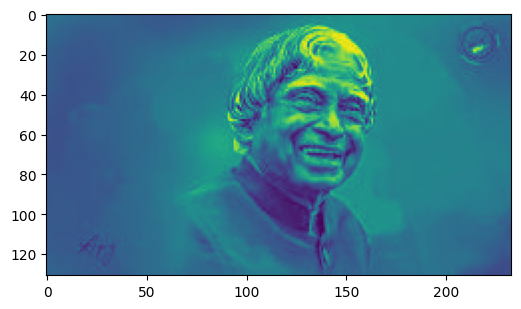

In [8]:
plt.figure(figsize=(6,4))
plt.imshow(ib)

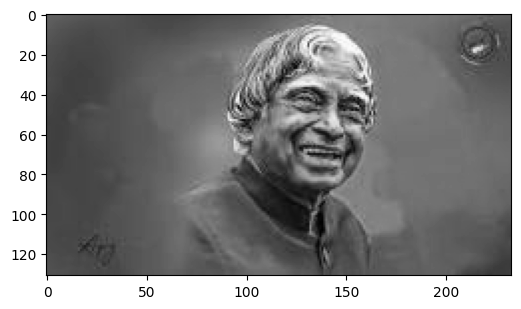

In [9]:
plt.figure(figsize=(6,4))
plt.imshow(ib,cmap=plt.cm.gray)

In [10]:
from sklearn.decomposition import PCA,IncrementalPCA
pca=PCA()
pca.fit(ib)

PCA()

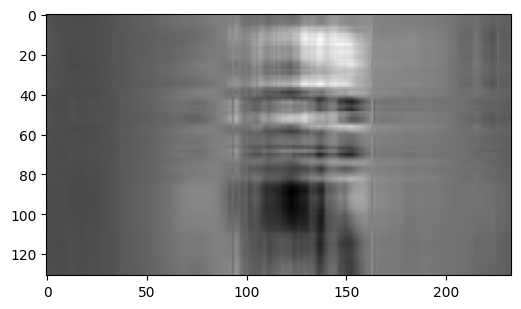

In [11]:
ipca=IncrementalPCA(n_components=2)
i=ipca.inverse_transform(ipca.fit_transform(ib))
plt.figure(figsize=(6,4))
plt.imshow(i,cmap=plt.cm.gray)

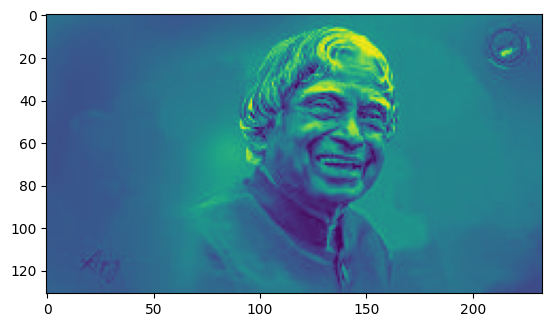

In [12]:
import cv2
gray_image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

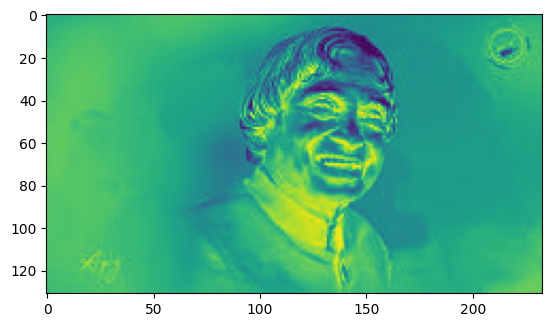

In [13]:
inverted_image=255-gray_image
plt.imshow(inverted_image)

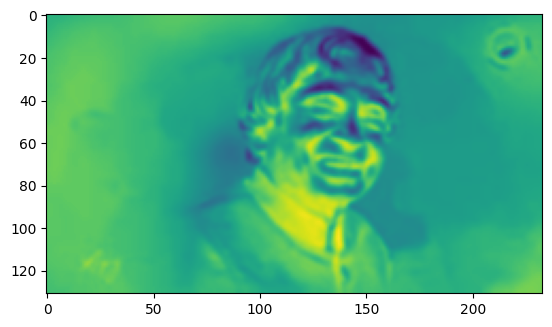

In [14]:
gblur_image1=cv2.GaussianBlur(inverted_image,(5,5),0) ##kernel size
plt.imshow(gblur_image1)

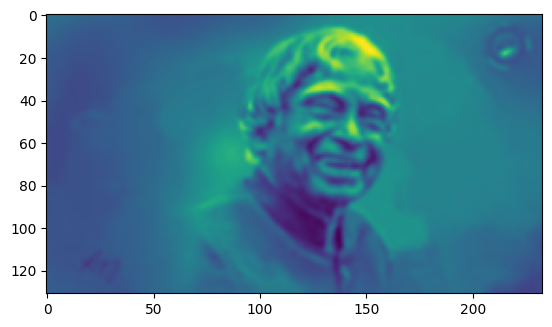

In [15]:
invgblur_image=255-gblur_image1
plt.imshow(invgblur_image)

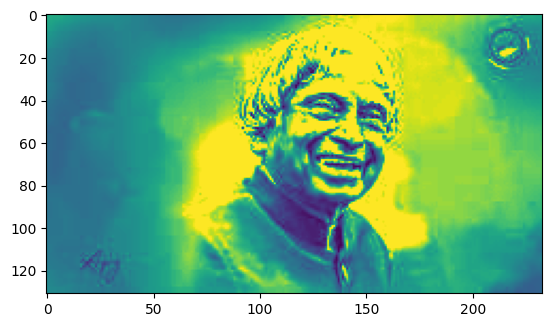

In [16]:
blur_image=255-inverted_image
p_image=255-blur_image
pencil_sketch1=cv2.divide(gray_image,p_image,scale=256.0)
plt.imshow(pencil_sketch1)

<ipython-input-17-cc2348f334ce>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


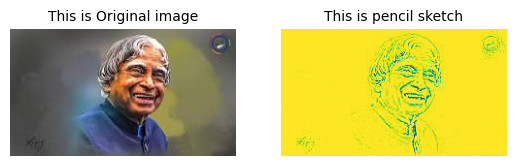

In [17]:
sketch_img=cv2.divide(gray_image,invgblur_image,scale=256.0)
plt.axis(False)
plt.imshow(sketch_img)
plt.subplot(1,2,1)
plt.title('This is Original image',size=10)
plt.imshow(image_raw)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('This is pencil sketch',size=10)
plt.imshow(sketch_img)
plt.axis('off')
plt.show()

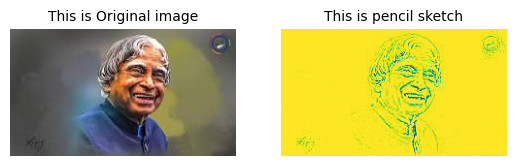

In [18]:
plt.subplot(1,2,1)
plt.title('This is Original image',size=10)
plt.imshow(image_raw)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('This is pencil sketch',size=10)
plt.imshow(sketch_img)
plt.axis('off')
plt.show()

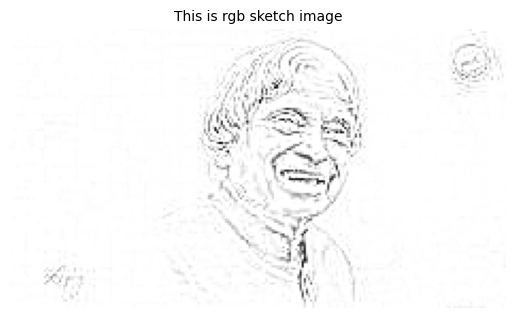

In [19]:
plt.title('This is rgb sketch image',size=10)
sketch=cv2.cvtColor(sketch_img,cv2.COLOR_BGR2RGB)
plt.imshow(sketch)
plt.axis('off')
plt.show()